# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 5: Modelo final

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import joblib
from preprocess import pfeature_process
import csv
import torch
import yaml
import sys
sys.path.insert(1, '../')
from models.network import create_model

In [58]:
#ubicacion de los archivos de datos con el modelo y el archivo FASTA procesado con CD-HIT
model_path = '../models/rf_model.pkl'
cd_hit_path = '../data/processed/VEGF.txt'

In [59]:
model = joblib.load(model_path)

In [4]:
vegf_data = pfeature_process(cd_hit_path, '../data/processed/vegf_processed.csv')

In [5]:
vegf_data

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,RRI_M,RRI_N,RRI_P,RRI_Q,RRI_R,RRI_S,RRI_T,RRI_V,RRI_W,RRI_Y
RGLRRLGRKIAHGVKKYGPTVLRIIRIA,0.563788,-0.658812,-0.299452,-0.618361,0.384032,0.973012,-0.098690,-0.778362,-0.658812,0.563788,...,-0.48418,-0.727467,0.825054,-0.62833,0.305349,-0.932553,1.150383,0.740777,-0.778134,1.289634
KWKLFKKIGIGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,-0.612534,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIGPGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,0.101139,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIPKFLHSAKKF,1.143364,-0.658812,-0.907237,-0.730238,-0.064949,-0.872485,0.186780,1.272951,-0.658812,1.143364,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
GLFDIAKKVIGVIGSL,-0.981747,0.319786,0.881189,-0.685487,1.515970,1.709951,-0.612534,-0.491620,0.319786,-0.981747,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,0.740777,-0.778134,-0.682112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSHSGWGCGHGSWSCGRRRRRRRR,0.850245,-0.658812,-0.599851,0.940459,-1.203210,-1.111833,-0.612534,-0.293105,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,5.787580,0.763511,-0.773765,-1.036578,1.005100,-0.682112
ACHGRRWGCGRHRGRCG,0.930187,-0.658812,-0.683684,0.164779,-0.621432,-0.400089,-0.612534,-0.524705,-0.658812,0.930187,...,-0.48418,-0.727467,-0.851265,-0.62833,0.362884,-0.932553,-0.773765,-1.036578,1.005100,-0.682112
GLFGCGRKKRRQRRRPPQ,1.143364,-0.658812,-0.907237,0.097652,-0.766877,-0.526061,0.971820,-0.557791,-0.658812,1.143364,...,-0.48418,-0.727467,2.501373,1.44575,1.127273,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112
KRRRRRRRRRE,4.241095,0.777518,-4.791476,-1.147912,-3.226787,-2.623503,-0.612534,-1.175391,0.777518,4.241095,...,-0.48418,-0.727467,-0.851265,-0.62833,6.609503,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112


In [8]:
vegf_seqs = pd.read_csv('../data/processed/vegf_processed.csv', index_col='Sequence')
vegf_seqs

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,RRI_M,RRI_N,RRI_P,RRI_Q,RRI_R,RRI_S,RRI_T,RRI_V,RRI_W,RRI_Y
Sequence,,,,,,,,,,,,,,,,,,,,,
RGLRRLGRKIAHGVKKYGPTVLRIIRIA,0.563788,-0.658812,-0.299452,-0.618361,0.384032,0.973012,-0.098690,-0.778362,-0.658812,0.563788,...,-0.48418,-0.727467,0.825054,-0.62833,0.305349,-0.932553,1.150383,0.740777,-0.778134,1.289634
KWKLFKKIGIGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,-0.612534,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIGPGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,0.101139,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIPKFLHSAKKF,1.143364,-0.658812,-0.907237,-0.730238,-0.064949,-0.872485,0.186780,1.272951,-0.658812,1.143364,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
GLFDIAKKVIGVIGSL,-0.981747,0.319786,0.881189,-0.685487,1.515970,1.709951,-0.612534,-0.491620,0.319786,-0.981747,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,0.740777,-0.778134,-0.682112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSHSGWGCGHGSWSCGRRRRRRRR,0.850245,-0.658812,-0.599851,0.940459,-1.203210,-1.111833,-0.612534,-0.293105,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,5.787580,0.763511,-0.773765,-1.036578,1.005100,-0.682112
ACHGRRWGCGRHRGRCG,0.930187,-0.658812,-0.683684,0.164779,-0.621432,-0.400089,-0.612534,-0.524705,-0.658812,0.930187,...,-0.48418,-0.727467,-0.851265,-0.62833,0.362884,-0.932553,-0.773765,-1.036578,1.005100,-0.682112
GLFGCGRKKRRQRRRPPQ,1.143364,-0.658812,-0.907237,0.097652,-0.766877,-0.526061,0.971820,-0.557791,-0.658812,1.143364,...,-0.48418,-0.727467,2.501373,1.44575,1.127273,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112


In [9]:
print(vegf_seqs)

                                  PCP_PC    PCP_NC    PCP_NE    PCP_PO  \
Sequence                                                                 
RGLRRLGRKIAHGVKKYGPTVLRIIRIA    0.563788 -0.658812 -0.299452 -0.618361   
KWKLFKKIGIGKFLHSAKKF            0.850245 -0.658812 -0.599851 -0.774988   
KWKLFKKIGPGKFLHSAKKF            0.850245 -0.658812 -0.599851 -0.774988   
KWKLFKKIPKFLHSAKKF              1.143364 -0.658812 -0.907237 -0.730238   
GLFDIAKKVIGVIGSL               -0.981747  0.319786  0.881189 -0.685487   
...                                  ...       ...       ...       ...   
ACSHSGWGCGHGSWSCGRRRRRRRR       0.850245 -0.658812 -0.599851  0.940459   
ACHGRRWGCGRHRGRCG               0.930187 -0.658812 -0.683684  0.164779   
GLFGCGRKKRRQRRRPPQ              1.143364 -0.658812 -0.907237  0.097652   
KRRRRRRRRRE                     4.241095  0.777518 -4.791476 -1.147912   
GFLGGIGAVLKVLTTGLPALISWIKRKRQQ -0.701951 -0.658812  1.027896  0.097652   

                                  PCP

In [ ]:
vegf_predict = model.predict(vegf_seqs)
print(vegf_predict)

[0 1 1 ... 1 1 0]


In [31]:
predict_results = pd.DataFrame(vegf_predict)
predict_results.index = vegf_seqs.index
predict_results.reset_index(inplace=True)
predict_results.rename(columns={'index':'Sequence', 0:'Label'}, inplace=True)
predict_positive = predict_results[predict_results['Label']==1]
#Solo la columna de secuencias se almacenara como CSV ya que los pasos siguientes solo requieren esta columna
predict_positive['Sequence'].to_csv('../data/processed/predicted_positive.csv', index = False)
print(f'El modelo clasifico {len(predict_positive)} registros como positivos contra tumores')

El modelo clasifico 1204 registros como positivos contra tumores


In [11]:
vegf_y = pd.read_csv('../data/processed/VEGF_y.csv')

In [13]:
vegf_report = classification_report(vegf_y, vegf_predict, target_names=['positive','negative'])
print(vegf_report)

              precision    recall  f1-score   support

    positive       1.00      0.56      0.72      2686
    negative       0.01      0.94      0.03        18

    accuracy                           0.56      2704
   macro avg       0.51      0.75      0.37      2704
weighted avg       0.99      0.56      0.71      2704



# Matriz de confusion

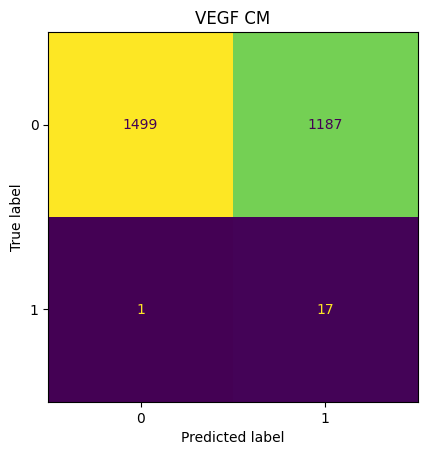

In [14]:
cm_vegf = confusion_matrix(vegf_y, vegf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vegf)
disp.plot(colorbar=False)
disp.ax_.set_title('VEGF CM')
plt.show()

# Curva ROC 

In [17]:
from sklearn.metrics import RocCurveDisplay

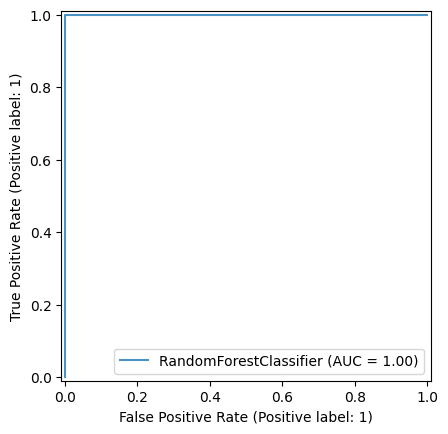

In [20]:

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model, vegf_seqs, vegf_y, ax=ax, alpha=0.8)
plt.show()

# Presición - Recall

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

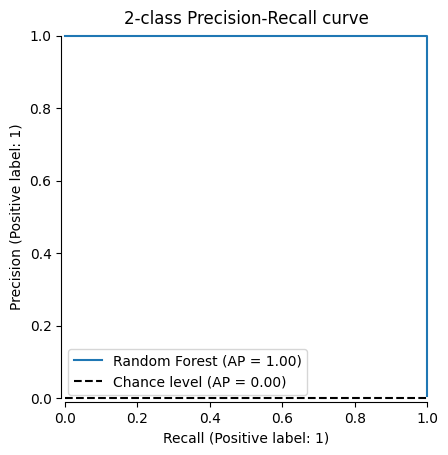

In [24]:

display = PrecisionRecallDisplay.from_estimator(
    model, vegf_seqs, vegf_y, name="Random Forest", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Diagrama de árbol 

In [25]:
from sklearn import tree

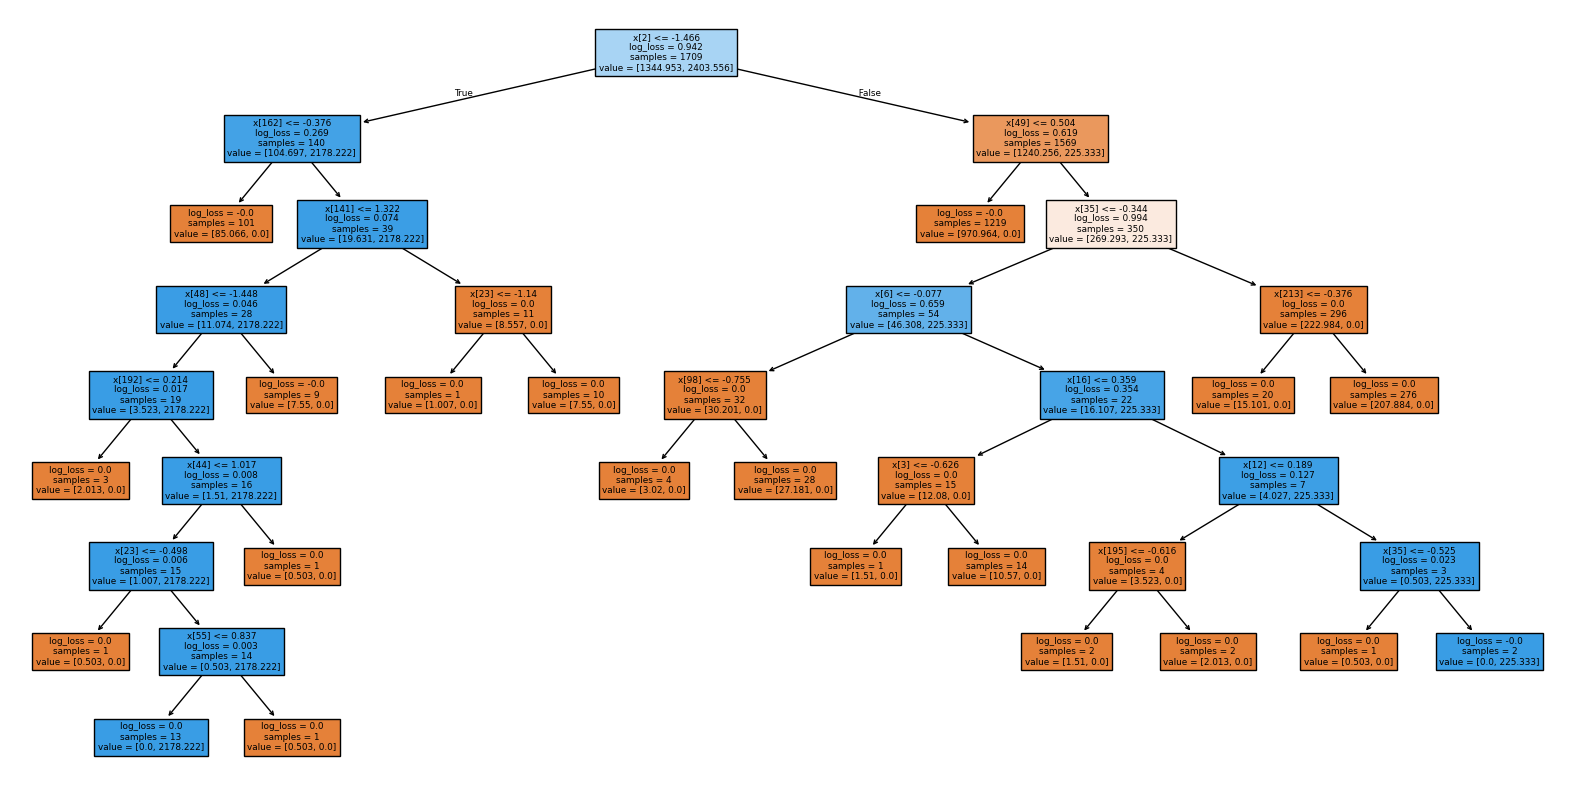

In [28]:
estimator = model.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(20, 10))
tree.plot_tree(estimator, filled=True)
plt.show()

# Procesamiento con peptideBERT

Uno de los objetivos del projecto es obtener caracteriscas de las secuencias para clasificarlas como no toxicas, o sin hemolisis, obtener su caracteristica de solubilidad y las caracteristicas de no adherencia. Para la obtencion de estas caracteristicas se usará un modelo de lenguaje llamado peptideBERT[1] este modelo es capaz de obtener las caracteristicas mencionadas anteriormente con un grado de confianza aceptable, el modelo tiene la siguiente arquitectura

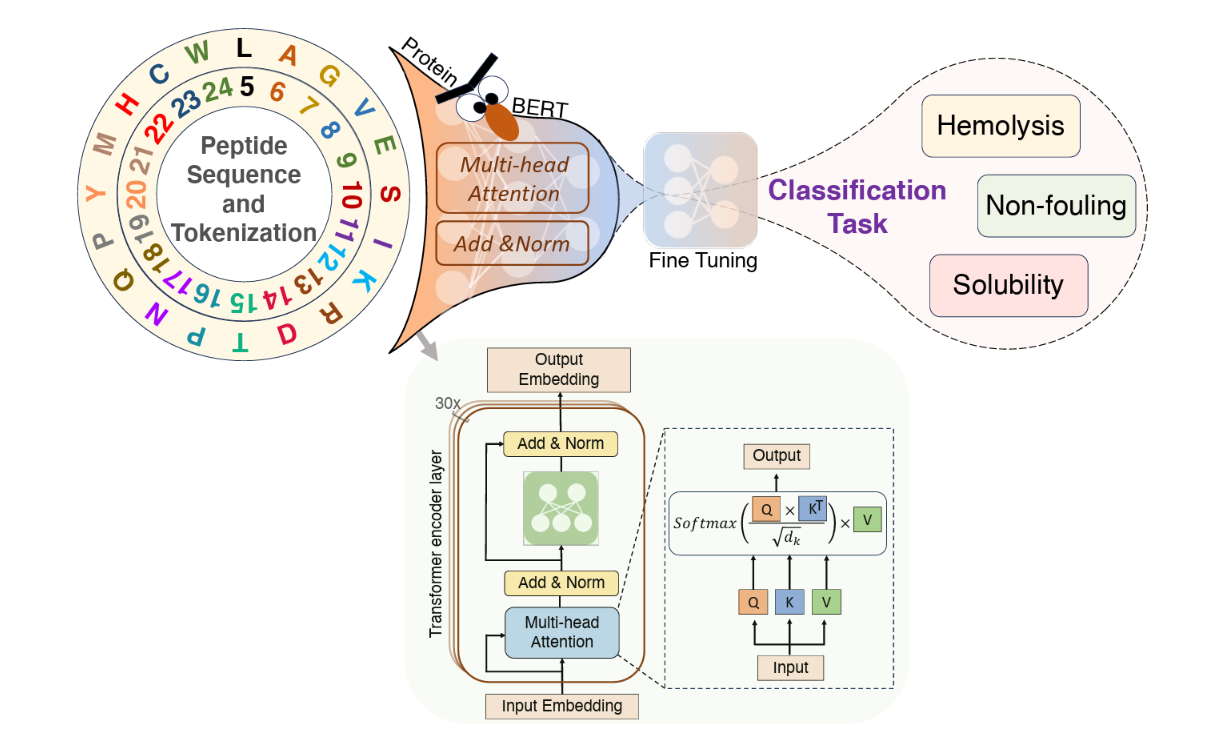

Con esta arquitectura, peptideBERT toma las secuencias de péptidos y son tokenizadas y procesadas a travez de protBERT a continuacion se clasifican usando una multicapa de perceptrones (MLPs) para obtener un proceso de fine tunning. Este modelo se entrena individualmente para obtener cada una de las caracteristicas, hemolisis, solubilidad y no adherencia

## Hemolisis

La hemólisis se define como la disrupción de las membranas de los glóbulos rojos, lo que lleva a una disminución en la vida útil de las células. Es esencial identificar agentes antimicrobianos o péptidos que no causen hemólisis para asegurar su uso seguro y no tóxico contra infecciones bacterianas, peptideBERT clasifica un peptido como hemolitico cuando el 50% de las células rojas (RBCs) se someten a lisis con una actividad menor a 100 µg/mL. 

## Solubilidad 

La solubilidad de un péptido se refiere a su capacidad para disolverse en un solvente específico, generalmente agua o soluciones buffer. PeptideBERT categoriza la solubilidad de los péptidos en solubles e insolubles basándose en datos de PROSO II. La clasificación se determina retrospectivamente a partir de registros electrónicos de laboratorio, en el contexto del Protein Structure Initiative

## No Adherencia 

La no adherencia en péptidos se refiere a la incapacidad de un péptido para interactuar y unirse de manera estable a una superficie específica, ya sea una membrana, un material sintético, o una biomolécula como una proteína o ADN. PeptideBERT clasifica la no adherencia (non-fouling) de los péptidos siguiendo la metodología de White et al., basada en la distribución de aminoácidos en las superficies exteriores de proteínas. Clasificando como muestras positivas basandose en los siguientes puntos:

Ejemplos positivos (Non-fouling peptides):

- Péptidos que siguen el patrón de distribución de aminoácidos observado en superficies de proteínas solubles, especialmente en entornos de alta tendencia a la agregación, como el citoplasma.
- Péptidos diseñados para autoensamblarse y generar superficies que minimizan la adsorción no específica.
- Péptidos con características similares a aquellas encontradas en proteínas chaperonas, donde evitar interacciones no específicas es fundamental.

Ejemplos negativos (Fouling peptides):

- Péptidos que no siguen este patrón y muestran una mayor tendencia a interacciones no específicas y agregación en superficies.

Para esta prueba de concepto se ejecutaran los tres modelos de peptideBERT en una funcion recursiva y se concatenaran los resultados en un dataframe para un mejor manejo

In [32]:
# funcion para cargar los modelos de peptideBERT
 
def load_bert_model(feature, device):
    config = yaml.load(open(f'../models/{feature}/config.yaml', 'r'), Loader=yaml.FullLoader)
    config['device'] = device
    model = create_model(config)
    model.load_state_dict(torch.load(f'../models/{feature}/model.pt',weights_only = False)['model_state_dict'], strict=False)
    return model

In [42]:
# ejecucion de peptideBERT

def predict_peptidebert(sequences, file_path):
    peptides =sequences.copy()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    MAX_LEN = max(map(len, sequences))
    # convert to tokens
    mapping = dict(zip(
        ['[PAD]','[UNK]','[CLS]','[SEP]','[MASK]','L',
        'A','G','V','E','S','I','K','R','D','T','P','N',
        'Q','F','Y','M','H','C','W'],
        range(30)
    ))

    
    for i in range(len(sequences)):
        sequences[i] = [mapping[c] for c in sequences[i]] 
        sequences[i].extend([0] * (MAX_LEN - len(sequences[i])))  # padding to max length
    
    results = pd.DataFrame({'Sequence':peptides})
    feats = ['hemo','sol','nf'] #definicion de las caracteristicas
    with torch.inference_mode():
        for c in feats:
            model = load_bert_model(c,device)
            preds = []
            for i in range(len(sequences)):
                input_ids = torch.tensor([sequences[i]]).to(device)
                attention_mask = (input_ids != 0).float()
                #output = float(model(input_ids, attention_mask)[0])
                output = int(model(input_ids, attention_mask)[0] > 0.5)
                #print(f'Secuencia {peptides[i]} {c]: {output}')
                preds.append(output)
                
            results = pd.concat([results,pd.DataFrame(preds, columns = [c]).astype(int)], axis=1)
    
    results.to_csv(file_path, index=False) #guarda los resultados en 
    return results
    

In [43]:
seqs = []
pos_seqs ='../data/processed/predicted_positive.csv' # carga de archivo con las secuencias a clasificar
output_file = '../data/processed/bert_vegf_features.csv'
with open(pos_seqs) as fp: # funcion para extraer las secuencias, ya que peptideBERT solo usa esta variable del dataset
    next(fp)
    f = csv.reader(fp, delimiter = ',', quotechar='"' )
    for line in f:
        seq = re.sub(r'[\[\'][\'\]]','',str(line)).strip()
        seqs.append(seq)
bert_results = predict_peptidebert(seqs,output_file)

In [44]:
bert_results

,Sequence,hemo,sol,nf
0,KWKLFKKIGIGKFLHSAKKF,0,1,0
1,KWKLFKKIGPGKFLHSAKKF,0,1,0
2,KWKLFKKIPKFLHSAKKF,0,1,0
3,KNLRRIIRKGIHIIKKYG,0,0,0
4,KNLRRIIRKIIHIIKKYG,0,0,0
...,...,...,...,...
1199,ACSHSGHGCGHGSHSCGRRRRRRRR,0,1,0
1200,ACSHSGWGCGHGSWSCGRRRRRRRR,0,1,0
1201,ACHGRRWGCGRHRGRCG,0,1,0
1202,GLFGCGRKKRRQRRRPPQ,0,1,0


Matriz de Correlación:
          hemo       sol        nf
hemo  1.000000 -0.264744 -0.062813
sol  -0.264744  1.000000  0.152043
nf   -0.062813  0.152043  1.000000


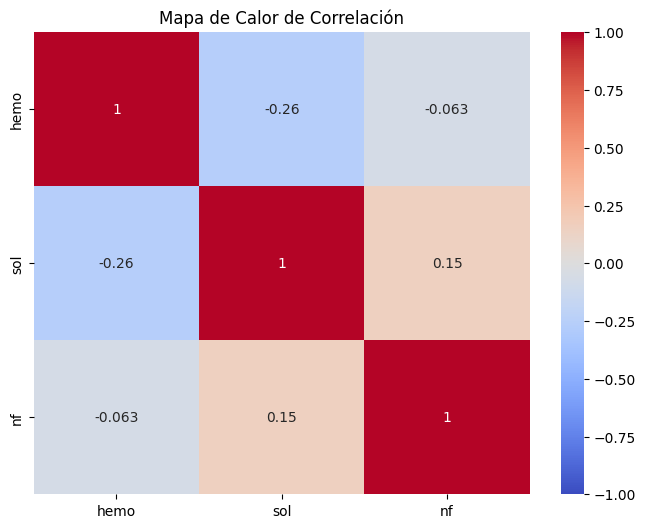

In [50]:
col_num = ['hemo','sol','nf']
correlation_matrix = bert_results[col_num].corr(numeric_only=True, method='pearson')
print("Matriz de Correlación:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()


In [46]:
#seleccionar los registros con hemolisis == 0
non_hemolytic = bert_results[bert_results['hemo']==0]
print(non_hemolytic)

                       Sequence  hemo  sol  nf
0          KWKLFKKIGIGKFLHSAKKF     0    1   0
1          KWKLFKKIGPGKFLHSAKKF     0    1   0
2            KWKLFKKIPKFLHSAKKF     0    1   0
3            KNLRRIIRKGIHIIKKYG     0    0   0
4            KNLRRIIRKIIHIIKKYG     0    0   0
...                         ...   ...  ...  ..
1199  ACSHSGHGCGHGSHSCGRRRRRRRR     0    1   0
1200  ACSHSGWGCGHGSWSCGRRRRRRRR     0    1   0
1201          ACHGRRWGCGRHRGRCG     0    1   0
1202         GLFGCGRKKRRQRRRPPQ     0    1   0
1203                KRRRRRRRRRE     0    0   1

[1164 rows x 4 columns]


In [47]:
non_hemolytic.to_csv('../data/final/vegf_non_hemolytic.csv')

array([[<Axes: title={'center': 'sol'}>, <Axes: title={'center': 'nf'}>]],
      dtype=object)

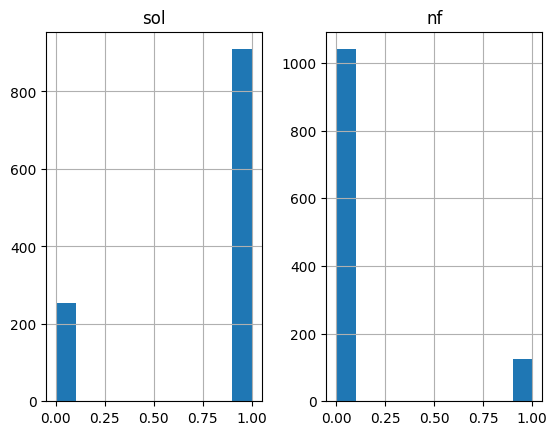

In [48]:
non_hemolytic.hist(column=['sol','nf'])

# Fine tunning con datos de VEGF

# Procesamiento de secuencias autogeneradas

Como parte del objetivo de este proyecto es la busqueda de la clasificacion de secuencias de peptidos nuevos, para lograr este objetivo se generará un set de datos con peptidos nuevos generados usando el modelo ProtXLNet[2] el cual puede generar secuencias de aminoácidos. Para esta prueba de concepto se generaron 2500 peptidos, teniendo como muestras una combinacion de secuencias que atacan tumores en general y secuencias que atacan especificamente a la molecula VEGF

In [52]:
cd_hit_path = '../data/processed/generated_seqs_cd_hit.txt'
generated_seqs = pfeature_process(cd_hit_path,'../data/processed/generated_seqs_pfeature.csv')

In [57]:
generated_predict = model.predict(generated_seqs)

In [55]:
print(generated_predict)

In [56]:
predict_results = pd.DataFrame(generated_predict)
predict_results.index = generated_seqs.index
predict_results.reset_index(inplace=True)
predict_results.rename(columns={'index':'Sequence', 0:'Label'}, inplace=True)
predict_positive = predict_results[predict_results['Label']==1]
#Solo la columna de secuencias se almacenara como CSV ya que los pasos siguientes solo requieren esta columna
predict_positive['Sequence'].to_csv('../data/processed/generated_predicted_positive.csv', index = False)
print(f'El modelo clasifico {len(predict_positive)} registros como positivos contra tumores')

In [ ]:
seqs = []
pos_seqs ='../data/processed/predicted_positive.csv' # carga de archivo con las secuencias a clasificar
output_file = '../data/processed/bert_vegf_features.csv'
with open(pos_seqs) as fp: # funcion para extraer las secuencias, ya que peptideBERT solo usa esta variable del dataset
    next(fp)
    f = csv.reader(fp, delimiter = ',', quotechar='"' )
    for line in f:
        seq = re.sub(r'[\[\'][\'\]]','',str(line)).strip()
        seqs.append(seq)
bert_results = predict_peptidebert(seqs,output_file)

# Referencias

1. Guntuboina, C., Das, A., Mollaei, P., Kim, S., & Farimani, A. B. (2023a). PeptideBERT: A Language Model based on Transformers for Peptide Property Prediction. arXiv (Cornell University). https://doi.org/10.48550/arxiv.2309.03099
2. Elnaggar, A., Heinzinger, M., Dallago, C., Rihawi, G., Wang, Y., Jones, L., Gibbs, T., Feher, T., Angerer, C., Steinegger, M., Bhowmik, D., & Rost, B. (2020). ProtTrans: towards cracking the language of life’s code through Self-Supervised Deep Learning and High Performance computing. arXiv (Cornell University). https://doi.org/10.48550/arxiv.2007.06225